## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tenso

In [2]:
train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import BatchNormalization


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
BATCH_SIZE=[256,512]
LEARNING_RATE = 1e-3
EPOCHS = 50

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    # 把舊的 Graph 清掉
    keras.backend.clear_session() 
    print()
    print('Batch size = ', batch_size)
    print()    
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = ('batch_zise=',batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Batch size =  256

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128

50000/50000 [==============================] - 12s 231us/step - loss: 1.2337 - accuracy: 0.5740 - val_loss: 1.5236 - val_accuracy: 0.4697
Epoch 46/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.2292 - accuracy: 0.5746 - val_loss: 1.5159 - val_accuracy: 0.4674
Epoch 47/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.2201 - accuracy: 0.5786 - val_loss: 1.5133 - val_accuracy: 0.4701
Epoch 48/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.2155 - accuracy: 0.5795 - val_loss: 1.5196 - val_accuracy: 0.4689
Epoch 49/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.2072 - accuracy: 0.5827 - val_loss: 1.5146 - val_accuracy: 0.4705
Epoch 50/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.2012 - accuracy: 0.5849 - val_loss: 1.5199 - val_accuracy: 0.4739

Batch size =  512

Model: "model_1"
_________________________________________________________________
Layer (ty

50000/50000 [==============================] - 10s 202us/step - loss: 1.4344 - accuracy: 0.5010 - val_loss: 1.5970 - val_accuracy: 0.4369
Epoch 40/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.4285 - accuracy: 0.5013 - val_loss: 1.5955 - val_accuracy: 0.4368
Epoch 41/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4233 - accuracy: 0.5035 - val_loss: 1.5914 - val_accuracy: 0.4377
Epoch 42/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.4169 - accuracy: 0.5061 - val_loss: 1.5920 - val_accuracy: 0.4381
Epoch 43/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.4120 - accuracy: 0.5081 - val_loss: 1.5886 - val_accuracy: 0.4377
Epoch 44/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.4068 - accuracy: 0.5099 - val_loss: 1.5844 - val_accuracy: 0.4396
Epoch 45/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.4002 - accuracy: 0.5123 - va

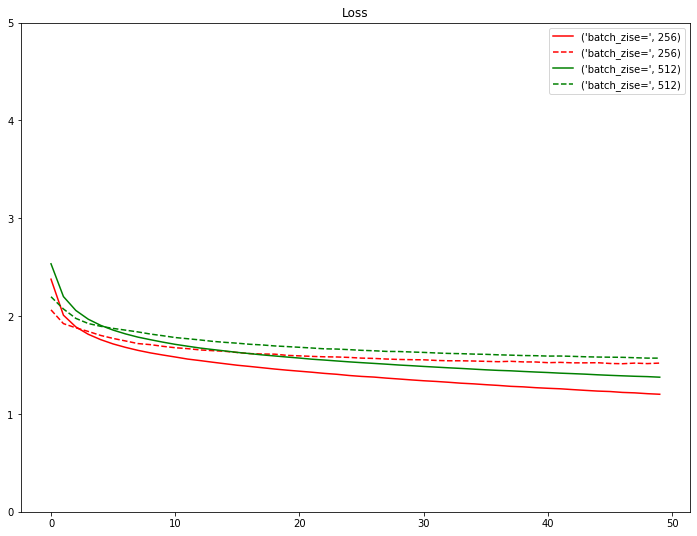

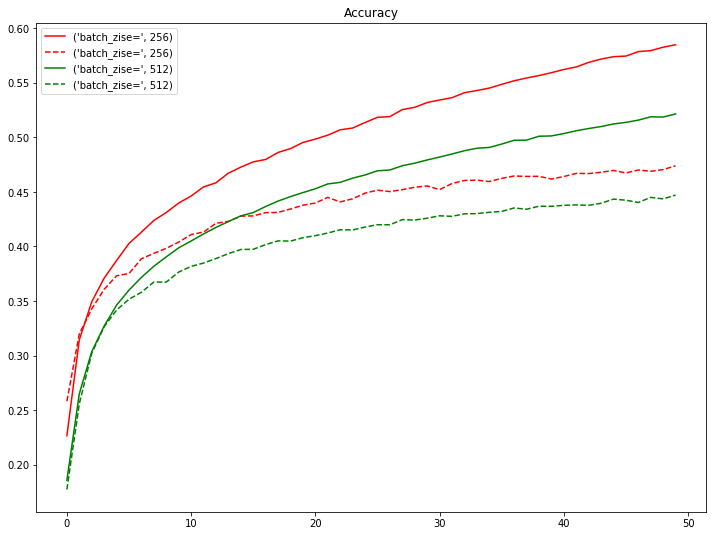

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k",'c','orange']

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 把 BN放在activation前面

In [16]:
from keras.layers.normalization import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    # 把舊的 Graph 清掉
    keras.backend.clear_session() 
    print()
    print('Batch size = ', batch_size)
    print()    
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = ('batch_zise=',batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Batch size =  256

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128

50000/50000 [==============================] - 12s 233us/step - loss: 1.6891 - accuracy: 0.4218 - val_loss: 1.7238 - val_accuracy: 0.4097
Epoch 46/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.6881 - accuracy: 0.4210 - val_loss: 1.7265 - val_accuracy: 0.4076
Epoch 47/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6871 - accuracy: 0.4225 - val_loss: 1.7264 - val_accuracy: 0.4090
Epoch 48/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.6858 - accuracy: 0.4240 - val_loss: 1.7231 - val_accuracy: 0.4046
Epoch 49/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.6855 - accuracy: 0.4233 - val_loss: 1.7235 - val_accuracy: 0.4074
Epoch 50/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.6847 - accuracy: 0.4238 - val_loss: 1.7245 - val_accuracy: 0.4062

Batch size =  512

Model: "model_1"
_________________________________________________________________
Layer (ty

Epoch 40/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.7271 - accuracy: 0.4068 - val_loss: 1.7501 - val_accuracy: 0.3928
Epoch 41/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.7256 - accuracy: 0.4078 - val_loss: 1.7490 - val_accuracy: 0.3930
Epoch 42/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.7238 - accuracy: 0.4092 - val_loss: 1.7472 - val_accuracy: 0.3962
Epoch 43/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.7234 - accuracy: 0.4098 - val_loss: 1.7472 - val_accuracy: 0.3944
Epoch 44/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.7212 - accuracy: 0.4099 - val_loss: 1.7467 - val_accuracy: 0.3937
Epoch 45/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.7203 - accuracy: 0.4098 - val_loss: 1.7442 - val_accuracy: 0.3961
Epoch 46/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.7191 - accuracy:

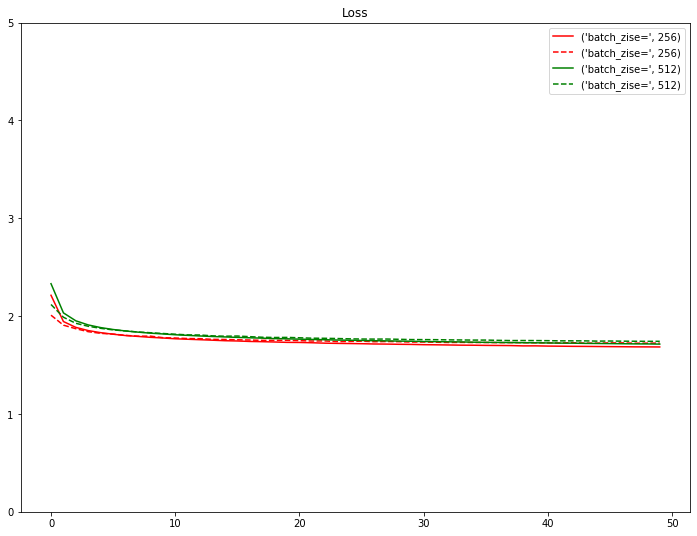

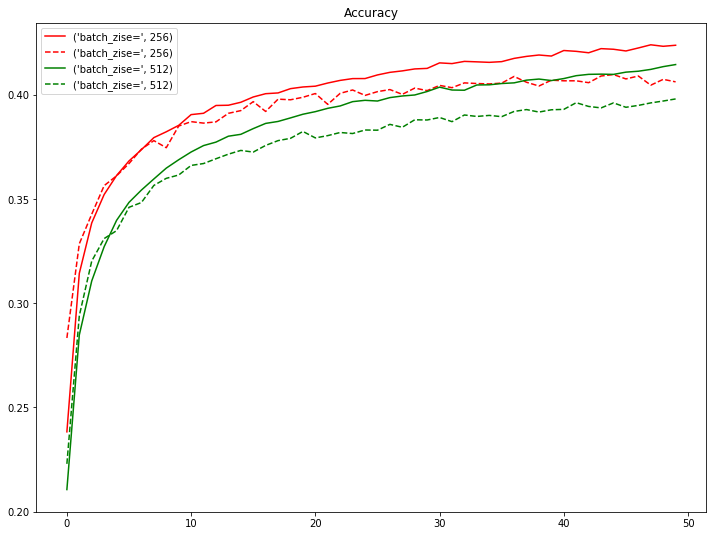

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k",'c','orange']

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## [ Batch Normalization ]
在輸入做feature scaling/normalization，Weights 修正的路徑比較會在同心圓山谷中往下滑，不過只在輸入層加不夠，可以每一層都re-scale
- 可以解決 Gradient vanishing 的問題可
- 以⽤用比較大的 learning rate
- 加速訓練
- 取代 dropout & regularizes
- 目前大多數的 Deep neural network 都會加
- 除了在 Inputs 做正規化以外，批次正規層讓我們能夠將每一層的輸入/輸出做正規化
- 各層的正規化使得 Gradient 消失 (gradient vanish) 或爆炸 (explode) 的狀狀況得以減輕 (但最近有paper對於這項論點有些不同意)

## [ 延伸閱讀 ]
[Batch Normalization原理與實戰](https://zhuanlan.zhihu.com/p/34879333)
<br>[為何要使用bathc normalization-莫凡python(影片)](https://morvanzhou.github.io/tutorials/machine-learning/ML-intro/3-08-batch-normalization/)